In [3]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

<h5>Correlation function

In [4]:
# record runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve_and_return_system_and_F_matrix() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1
delta_diff =  64.183848505511
Iteration nr. 2
delta_diff =  10.513456536743753
Iteration nr. 3
delta_diff =  7.268507639203042
Iteration nr. 4
delta_diff =  0.942670876242068
Iteration nr. 5
delta_diff =  0.08691819136854846
Iteration nr. 6
delta_diff =  0.007403127363262159
Iteration nr. 7
delta_diff =  0.0005448974724488822
Iteration nr. 8
delta_diff =  1.7781653226491336e-05
Time:  69.25886245898437


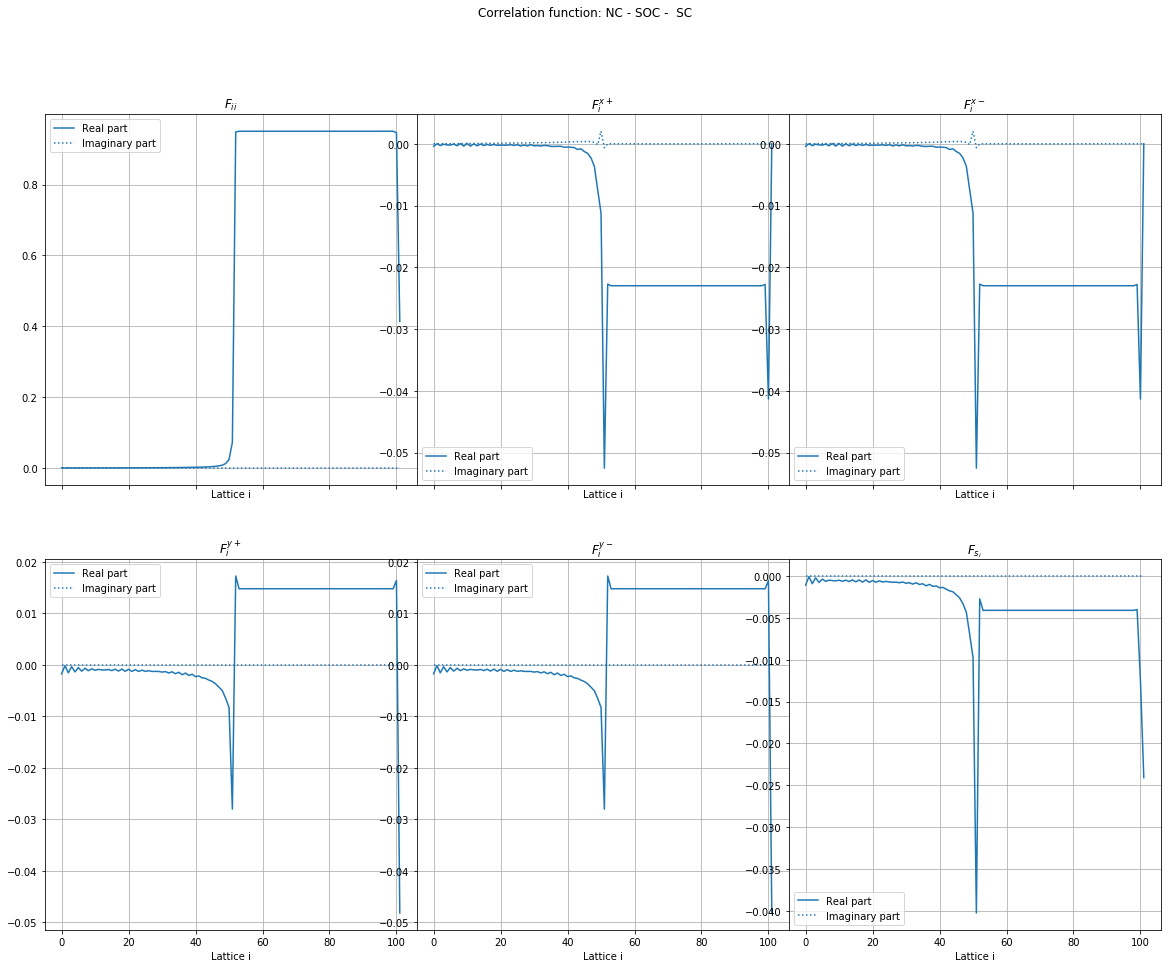

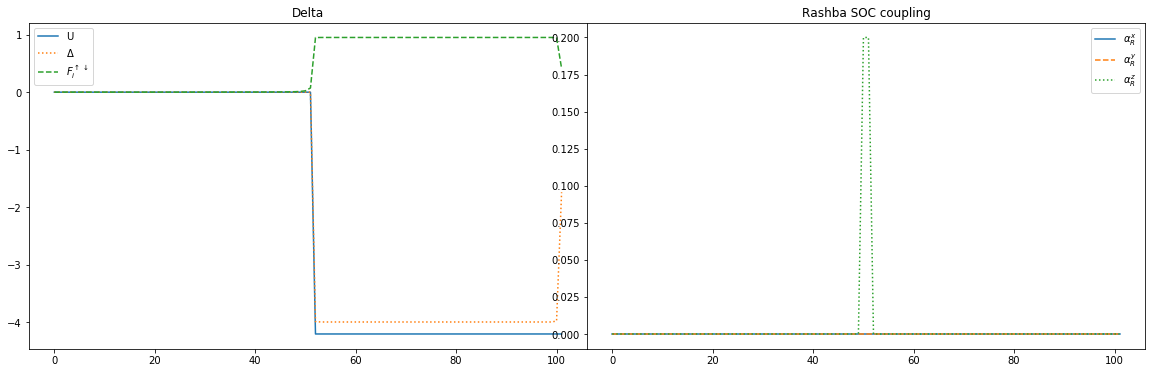

In [5]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h5> Density of States

In [6]:
# record runtime
import timeit
start = timeit.default_timer()

ldos, energy_state = system.ldos_from_problem(0.01, 0.03, -6, 6) # resolution, sigma, min e, max e

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  726.9169490579807


In [7]:
print(ldos.shape)
print(energy_state.shape)

(102, 1200)
(1200,)


(1200,)
(102, 1200)


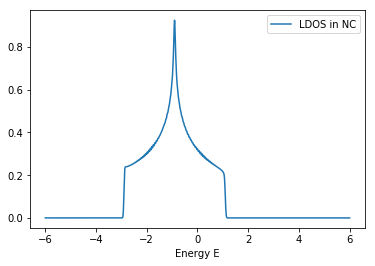

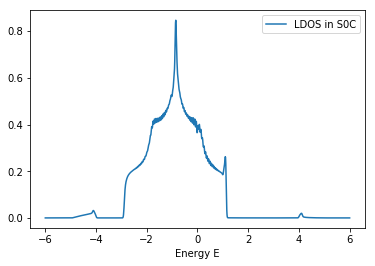

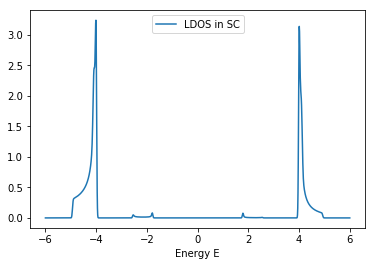

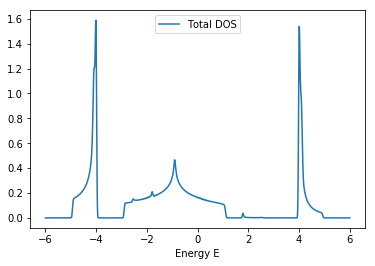

In [8]:
plot_density_of_states(energy_state, ldos)

Text(0,0.5,'#')

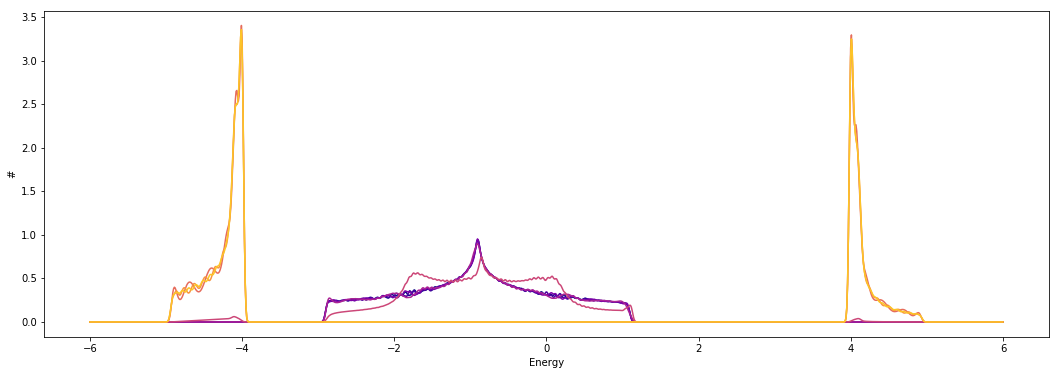

In [9]:
# plot all ldos for each medium

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 5
delta_range = 20
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0,0.5,'Energy')

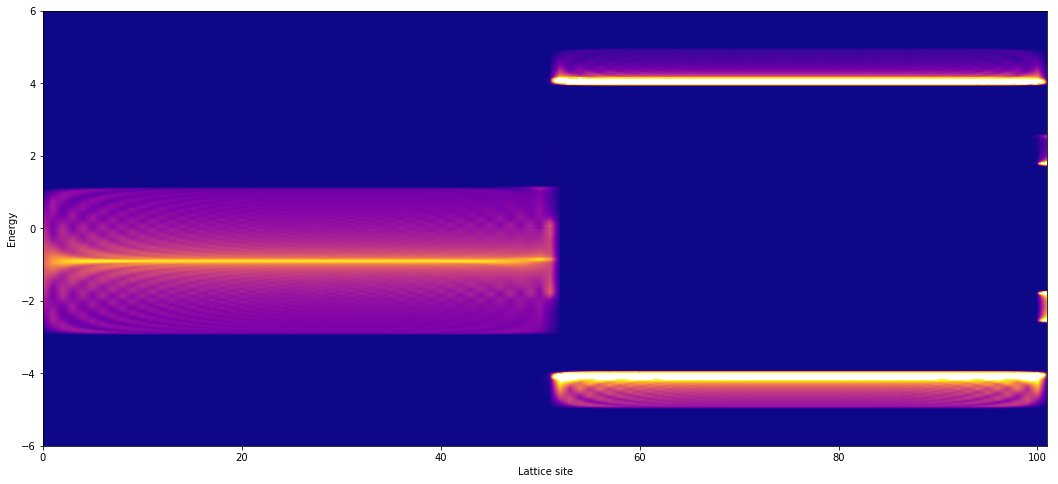

In [10]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 1, 500))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

Text(0,0.5,'#')

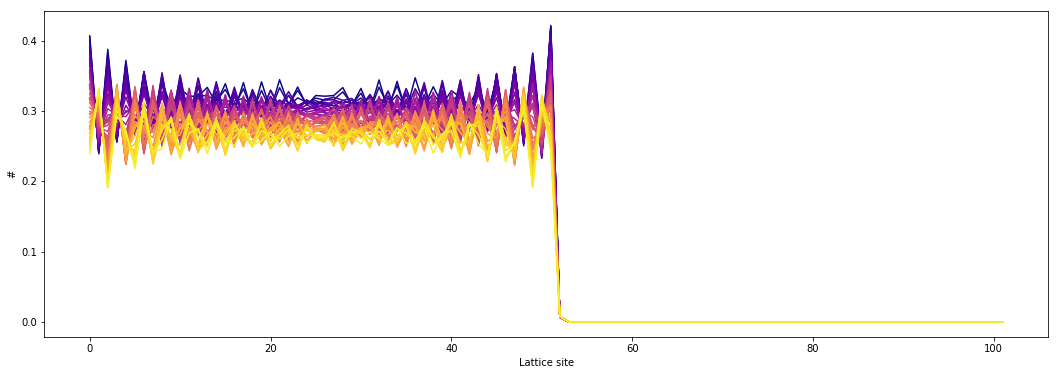

In [9]:
# Try to plot only middle energies
# Hva plottes egentlig?

fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 1
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")

In [ ]:
def current_at_site_i(system, ix):
    current = np.zeros(len(system.eigenvalues.shape[0])//4)
    tanh_coeff = np.tanh(system.beta * system.eigenvalues / 2)
    t = system.t_0
    C=1
    B=1
    for ix in range(len(system.eigenvalues.shape[0])//4):
        #---- sum over sigma----#
        #u:
        current[ix] += (conj(system.eigenvectors[4*ix, n, k]) * system.eigenvectors[4*(ix+1), n, k]) #sigma = 1
        current[ix] -= (conj(system.eigenvectors[4*ix + 1, n, k]) * system.eigenvectors[4*(ix+1) + 1, n, k]) #sigma = 2
        #v:
        current[ix] += (conj(system.eigenvectors[4*ix+2, n, k]) * system.eigenvectors[4*(ix+1)+2, n, k]) #sigma = 1
        current[ix] += (conj(system.eigenvectors[4*ix + 3, n, k]) * system.eigenvectors[4*(ix+1) + 3, n, k]) #sigma = 2
        
        
        #--- sum over alpha and beta ----#
        #u:
        current[ix] += C * (conj(system.eigenvectors[4*ix, n, k]) * system.eigenvectors[4*(ix+1), n, k]) #alpha=1, beta=1
        current[ix] += C * (conj(system.eigenvectors[4*ix + 1, n, k]) * system.eigenvectors[4*(ix+1) + 1, n, k]) #alpha=2, beta=2
        current[ix] += C * (conj(system.eigenvectors[4*ix, n, k]) * system.eigenvectors[4*(ix+1) + 1, n, k]) #alpha=1, beta=2
        current[ix] += C * (conj(system.eigenvectors[4*ix + 1, n, k]) * system.eigenvectors[4*(ix+1), n, k]) #alpha=2, beta=1
        #v:
        current[ix] += C * (conj(system.eigenvectors[4*ix + 2, n, k]) * system.eigenvectors[4*(ix+1) + 2, n, k]) #alpha=1, beta=1
        current[ix] += C * (conj(system.eigenvectors[4*ix + 3, n, k]) * system.eigenvectors[4*(ix+1) + 3, n, k]) #alpha=2, beta=2
        current[ix] += C * (conj(system.eigenvectors[4*ix + 2, n, k]) * system.eigenvectors[4*(ix+1) + 3, n, k]) #alpha=1, beta=2
        current[ix] += C * (conj(system.eigenvectors[4*ix + 3, n, k]) * system.eigenvectors[4*(ix+1) + 2, n, k]) #alpha=2, beta=1

<h5> Phase Diagram

In [ ]:
def calculate_systems(max_iter=100, 
                      beta=30,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3):
    """
    Calculate the energy for SC and SOC systems at a beta.
    """
    #NC
    nc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial, L_nc = 5, L_sc = 0, L_soc=0)
    solve_system(nc_system, max_iter, tol_iter)
    
    # SOC
    soc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial, L_nc = 0, L_sc = 0, L_soc=5)
    solve_system(soc_system, max_iter, tol_iter)
    
    # SC
    sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial, L_nc = 0, L_sc = 5, L_soc=0)
    solve_system(sc_system, max_iter, tol_iter)
    
    energies_nc_soc_sc = np.array([nc_system.compute_energy(), soc_system.compute_energy(), sc_system.compute_energy()])
    return energies_nc_soc_sc

In [ ]:
#Try to compute phase diagram for beta

In [16]:
def pd_search_along_beta(min_beta = 200, max_beta=400, num_beta_step=5, tol=1e-3):
    es = np.zeros(shape=(num_beta_step, 3), dtype=np.float128)
    tps = ['P', 'SOC', 'SC']
    beta_array = np.linspace(min_beta, max_beta, num_beta_step)
    for i in range(num_beta_step):
        print("---- beta = ", beta_array[i], "-----")
        e = calculate_systems(beta=beta_array[i])
        es[i,:] = e[:] # es:soc energy, sc energy
    return es, beta_array

In [ ]:
e, b = pd_search_along_beta()

In [ ]:
plt.plot(b, e[:,0])
plt.plot(b, e[:,1])

In [ ]:
# Try to compute phase diagram for alpha

In [122]:
def pd_search_along_alpha_strength(alpha_max, L_nc = 50, L_soc = 2, L_sc = 50, theta = 0, xz = False, yz = False):
    alpha = np.ones((len(alpha_max), 3), dtype=np.float64)
    for i in range(len(alpha_max)):
        alpha[i] = alpha_max[i]*alpha[i,:]
        
    
    if(xz==True):
        alpha[:] = alpha[:]*np.array([np.sin(theta), 0*theta, np.cos(theta)]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha[:] = alpha[:]*np.array([0*theta, np.sin(theta), np.cos(theta)]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return

    free_energy = np.zeros(shape=(alpha.shape[0], 3), dtype=np.float128)
    tps = ['NC', 'SOC', 'SC']
    
    for i in range(alpha.shape[0]):
        print("---- alpha = ", alpha[i, :], "-----")
        e = calculate_systems(alpha_R_initial = alpha[i, :])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, alpha_max

In [123]:
alpha_max = np.linspace(0,4,60)
free_energy_alpha_strengt, alpha_max_array = pd_search_along_alpha_strength(alpha_max=alpha_max, xz=True)

---- alpha =  [0. 0. 0.] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.3286118109180256
Iteration nr. 2
delta_diff =  0.10952285577096932
Iteration nr. 3
delta_diff =  0.3948724590378736
Iteration nr. 4
delta_diff =  2.3840716668263537
Iteration nr. 5
delta_diff =  1.1359323524606775
Iteration nr. 6
delta_diff =  0.3869933645828591
Iteration nr. 7
delta_diff =  0.18921818549745106
Iteration nr. 8
delta_diff =  0.10237257691919277
Iteration nr. 9
delta_diff =  0.05783309947462466
Iteration nr. 10
delta_diff =  0.033401483425685836
Iteration nr. 11
delta_diff =  0.019532134017808858
Iteration nr. 12
delta_diff =  0.011506274814242915
Iteration nr. 13
delta_diff =  0.006808994905037366
Iteration nr. 14
delta_diff =  0.004040758170551745
Iteration nr. 15
delta_diff =  0.002402313875126697
Iteration nr. 16
delta_di

In [124]:
print(free_energy_alpha_strengt.shape)

(60, 3)


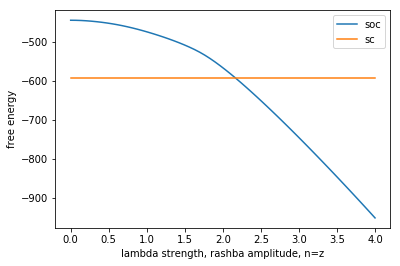

In [164]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(alpha_max_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,1], label="soc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,2], label="sc")
plt.xlabel("lambda strength, rashba amplitude, n=z")
plt.ylabel("free energy")
plt.legend()
plt.savefig('PD - free_energy_lambda_strength, n=z.png', dpi=200, bbox_inches='tight')
plt.show()

In [145]:
def pd_search_along_alpha_angle(alpha_max = 2, L_nc = 7, L_soc = 3, L_sc = 7, xz=False, yz=False):
    theta = np.linspace(0,np.pi/2,30)
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 3), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_systems(alpha_R_initial = alpha[:,i])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, theta

In [150]:
#magnitude of alpha vector
alpha_max = 2.5

free_energy_angle_pd_xz, theta_array_pd_xz = pd_search_along_alpha_angle(alpha_max=alpha_max, xz=True)
free_energy_angle_pd_yz, theta_array_pd_yz = pd_search_along_alpha_angle(alpha_max=alpha_max, yz=True)

(3, 30)
(30, 3)
---- alpha =  [0.  0.  2.5] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.3286118109180256
Iteration nr. 2
delta_diff =  0.10952285577096932
Iteration nr. 3
delta_diff =  0.3948724590378736
Iteration nr. 4
delta_diff =  2.3840716668263537
Iteration nr. 5
delta_diff =  1.1359323524606775
Iteration nr. 6
delta_diff =  0.3869933645828591
Iteration nr. 7
delta_diff =  0.18921818549745106
Iteration nr. 8
delta_diff =  0.10237257691919277
Iteration nr. 9
delta_diff =  0.05783309947462466
Iteration nr. 10
delta_diff =  0.033401483425685836
Iteration nr. 11
delta_diff =  0.019532134017808858
Iteration nr. 12
delta_diff =  0.011506274814242915
Iteration nr. 13
delta_diff =  0.006808994905037366
Iteration nr. 14
delta_diff =  0.004040758170551745
Iteration nr. 15
delta_diff =  0.002402313875126697
Iterat

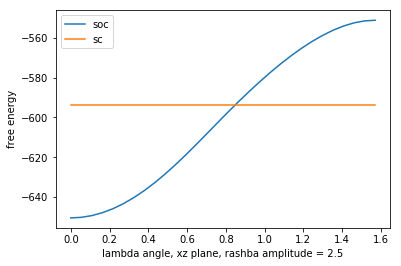

In [159]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,1], label="soc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,2], label="sc")
plt.xlabel("lambda angle, xz plane, rashba amplitude = 2.5")
plt.ylabel("free energy")
plt.legend()
plt.savefig('PD - free_energy_lambda_angle_xz, strength=2.5.png', dpi=200, bbox_inches='tight')
plt.show()

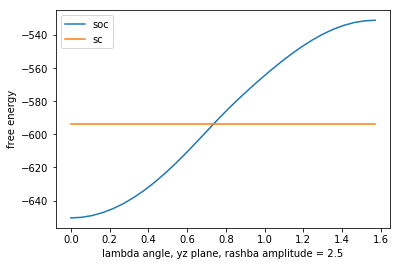

In [163]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,0], label="nc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,1], label="soc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,2], label="sc")
plt.xlabel("lambda angle, yz plane, rashba amplitude = 2.5")
plt.ylabel("free energy")
plt.legend()
plt.savefig('PD - free_energy_lambda_angle_yz, strengt=2.5.png', dpi=200, bbox_inches='tight')
plt.show()

In [4]:
def phase_transition_SOC_SC(beta, 
                            max_beta=400, 
                            min_beta=1, 
                            tol_beta=1e-3):

    lower = min_beta
    upper = max_beta
    mid = (upper+lower)/2
    
    # soc
    soc_system = define_system(beta=beta, L_nc = 0, L_soc = 100, L_sc = 0)
    solve_system(soc_system)
    
    # sc
    sc_system = define_system(beta=beta, L_nc = 0, L_soc = 0, L_sc = 100)
    solve_system(sc_system)
    
    energies_soc_sc = np.array([soc_system.compute_energy(), sc_system.compute_energy()])
    start = np.argmin(energies_soc_sc, axis=0)
    
    while upper-lower > tol_beta:
        # soc
        soc = define_system(beta=beta, L_nc = 0, L_soc = 100, L_sc = 0)
        solve_system(soc)
        energies_soc_sc[0] = soc.compute_energy()
        
        # sc 
        sc = define_system(beta=beta, L_nc = 0, L_soc = 0, L_sc = 100)
        solve_system(sc)
        energies_soc_sc[1] = sc.compute_energy()
            
        ind = np.argmin(energies_soc_sc, axis=0)
        if ind == start:
            lower = mid
        else:
            upper = mid
        mid = (upper + lower)/2
        
    if upper == max_beta:
        mid = -1
    return mid

phase_transition_to_paramagnetic(delta=0.01, n=0.7, iter_tol=1e-4, mag_tol=0.01, beta=300, tol_t=1e-2)

n = np.concatenate(
    (
        np.linspace(0.01, 0.1, 8, endpoint=False), 
        np.linspace(0.1, 0.8, 7, endpoint=False),
        np.linspace(0.8, 1.2, 10, endpoint=False),
        np.linspace(1.2, 1.9, 8),
        np.flip(np.linspace(1.99, 1.9, 8, endpoint=False), axis=0)
))

beta_array = np.linspace(1, 400, 5)

In [ ]:
tol_beta=1e-3
iter_tol=1e-4
beta_array = np.linspace(1, 400, 5)
phase_transit = np.zeros(shape=(1, beta_array.shape[0]), dtype=np.float64)
for i in range(beta_array.shape[0]):
    #phase_transit_2pm[0, i] = phase_transition_to_paramagnetic(phase = 1, delta=0.01, n=n[i], iter_tol=iter_tol, mag_tol=mag_tol, beta=beta, tol_t=tol_t, max_t=1.0, min_t=0.001)
    #phase_transit_2pm[1, i] = phase_transition_to_paramagnetic(phase=2, delta=0.01, n=n[i], iter_tol=iter_tol, mag_tol=mag_tol,beta=beta, tol_t=tol_t, max_t=1.0, min_t=0.001)
    #upper = np.max[]
    
    phase_transits[i] = phase_transition_SOC_SC(beta=beta_array[i])


In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(phase_transits.shape[0]):
    ax.plot(beta_array, phase_transits[i])
mask = phase_transits[0, :] < 0.0
ax.plot(beta_array[~mask], phase_transits[0, ~mask])
#ax.plot(np.linspace(0.1, 1.9, phase_transit_fm2pm.shape[0]), phase_transit_fm2pm)
ax.set_ylim(0, 0.75)
ax.set_xlim(0.0, 2.0)

<h5> Free Energy diagram w.r.t. rashba alpha orientation

In [165]:
#Free energy

def calculate_energy_of_system(max_iter=100, 
                      beta=33.3,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3,
                      L_nc = 50, L_soc = 2, L_sc = 50):
    """
    Calculate the energy for nc - soc - sc system at a given alpha.
    """
    #nc - soc - sc
    nc_soc_sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial, L_nc = L_nc, L_sc = L_sc, L_soc=L_soc)
    solve_system(nc_soc_sc_system, max_iter, tol_iter)
    
    
    energies_nc_soc_sc = np.array([nc_soc_sc_system.compute_energy(N=False)]) #N=True gives only free energy in NC layer
    return energies_nc_soc_sc

def search_along_alpha(alpha_max = 2, L_nc = 50, L_soc = 2, L_sc = 50, xz=False, yz=False):
    #phi = np.linspace(0,np.pi,30)
    theta = np.linspace(0,np.pi/2,30)
    #alpha = alpha_max*np.array([np.cos(phi[:]), np.sin(phi[:]), 0*phi[:]]) # xy plane, Theta=0
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 1), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_energy_of_system(alpha_R_initial = alpha[:,i], L_nc = L_nc, L_soc = L_soc, L_sc = L_sc)
        free_energy[i,:] = e[:] 
    return free_energy, theta

In [166]:
#magnitude of alpha vector
alpha_max = 0.8

free_energy_array_nc_soc_xz, theta_array_nc_soc_xz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, xz=True)
free_energy_array_nc_soc_yz, theta_array_nc_soc_yz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, yz=True)
#free_energy_array_soc_sc, alpha_array_soc_sc = search_along_alpha(alpha_max=alpha_max, L_nc=0, L_soc=2, L_sc=5)

---- alpha =  [0.  0.  0.8] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.04331113 0.         0.79882673] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.08649521 0.         0.79531037] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.1294256  0.         0.78946122] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.17197635 0.         0.78129644] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.21402267 0.         0.77083999] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.25544122 0.         0.75812254] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.29611052 0.      

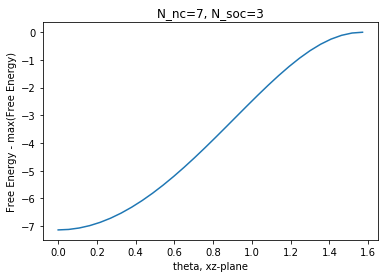

In [167]:
plt.plot(theta_array_nc_soc_xz, free_energy_array_nc_soc_xz-max(free_energy_array_nc_soc_xz))
plt.xlabel('theta, xz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
plt.savefig('free_energy_lambda_angle_xz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

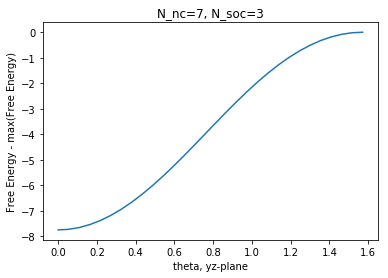

In [168]:
plt.plot(theta_array_nc_soc_yz, free_energy_array_nc_soc_yz-max(free_energy_array_nc_soc_yz))
plt.xlabel('theta, yz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
plt.savefig('free_energy_lambda_angle_yz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

In [11]:
Fs = np.pad(np.array([0.3], dtype=np.complex128),  (0,8), mode='constant', constant_values=0.0)
print(Fs)

[0.3+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [13]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]
[[ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]]


In [17]:
print(a[:,:]*b[:,:])
c = a*b
tmp1 = np.sum(a*b)
tmp = 0
for i in range(len(c)):
    for j in range(len(c[0])):
        tmp += c[i,j]
print(tmp)
print(tmp1)

[[  1.  12.  33.  64. 105.]
 [  6.  28.  60. 102. 154.]
 [ 15.  48.  91. 144. 207.]
 [ 28.  72. 126. 190. 264.]
 [ 45. 100. 165. 240. 325.]]
2625.0
2625.0


In [16]:
a1, a2 = np.where(a>= 5.0)
print(a1)
print(a2)

[1 1 2 2 2 2 3 3 3 3]
[2 3 0 1 2 3 0 1 2 3]


In [17]:
for i in range(len(a1)):
    print(a[a1[i]][a2[i]])

5.0
6.0
5.0
6.0
7.0
8.0
7.0
8.0
9.0
10.0


In [12]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0

In [8]:
a = np.linspace(-3,10,14)
print(a)
print(a[a<0])

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[-3. -2. -1.]


In [9]:
a = np.ones((5,5))
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
    

In [10]:
print(a)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]


[[ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]
